# King County Dataset Linear Regression Model 11

### Adjustments for this model:
    Start with getting rid of 'id',
    Then deal with the NaN's in 'view', 'yr_renovated', 'waterfront', and 'sqft_basement'
    Change "?" in 'sqft_basement'
    Take care of outlier in bedrooms
    Deal with the date feature
    Bin: 'view', 'grade', 'sqft_basement', 'yr_renovated', 'waterfront', 'condition'
    Lot Transform: 'sqft_above', 'sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15' are skewed right.
    Max/Min: 
    Standardization: 'sqft_above', 'sqft_living','sqft_lot','sqft_living15', 'sqft_lot15'
   

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [82]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Missing Data

In [83]:
# Change "?" in 'sqft_basement' to '0';
data.sqft_basement = data.sqft_basement.replace(to_replace = '?', value = '0')

In [84]:
# Account for missing data in 'waterfront', 'view', 'yr_renovated';
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)
data.view.fillna(value=data.view.median(), inplace = True)
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)
data.sqft_basement.fillna(value=data.sqft_basement.median(), inplace = True)


In [85]:
# Change outlier '33' to '3' in 'bedrooms';
data.at[15856,'bedrooms'] = 3

In [86]:
# Change 'sqft_basement' from an object to a float:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [87]:
# Contains irrelevent information!
data = data.drop(["id"], axis=1)

### Date Feature

In [88]:
#Old version.  Still not working!
####import datetime as dt
####data['date'] = pd.to_datetime(data.date)

In [89]:
# Change 'date' feature to float;
import datetime as dt

#Run this code first and then change it!
data["date"] = pd.to_datetime(data["date"], format = "%m/%d/%Y")

# I want day first, but it won't work this way.
#data["date"] = pd.to_datetime(data["date"], format = "%d/%m/%Y")

(array([2326., 2940., 2589., 2242., 2247., 1926., 1294., 1704., 2670.,
        1659.]),
 array([735355., 735394., 735433., 735472., 735511., 735550., 735589.,
        735628., 735667., 735706., 735745.]),
 <a list of 10 Patch objects>)

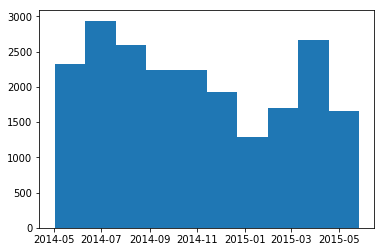

In [90]:
plt.hist(data.date)

### Outliers

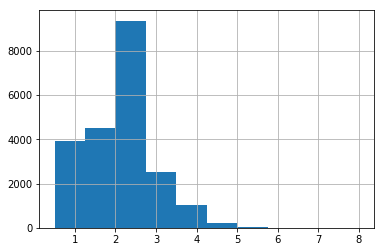

In [91]:
data.bathrooms.hist()

In [92]:
data.bathrooms.describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [93]:
data.loc[data["bathrooms"] == 8]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [94]:
# Drop 'bathrooms' that are greater than '7'
data = data[data.bathrooms != 8]
data = data[data.bathrooms != 7.75]
data = data[data.bathrooms != 7.5]

In [95]:
data = data[data.bathrooms < 7]

In [96]:
data.bathrooms.std()*3 + data.bathrooms.mean()

4.4101639939989195

In [97]:
len(data.loc[data["bathrooms"] > 5])

39

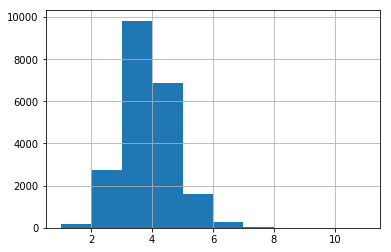

In [98]:
data.bedrooms.hist()

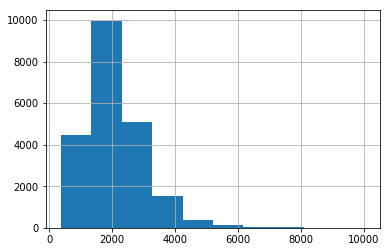

In [99]:
data.sqft_living.hist()

In [100]:
data.sqft_living.std()*3

2732.1142745509715

In [101]:
data.sqft_living.mean() + data.sqft_living.std()*3

4810.990808612936

In [102]:
len(data.loc[data["sqft_living"] > 5000])

208

In [103]:
data = data[data.sqft_living < 5000]

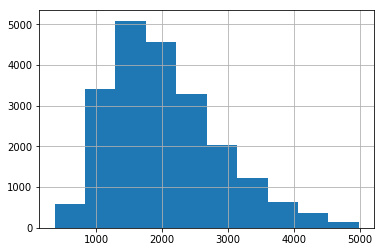

In [104]:
data.sqft_living.hist()

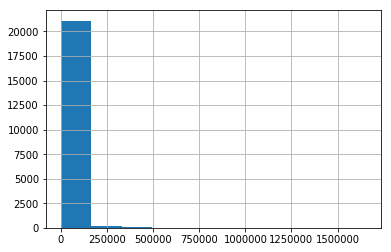

In [105]:
data.sqft_lot.hist()

In [106]:
data.sqft_lot.mean()

14679.33735559609

In [107]:
# Three standard deviations is about a half acre
data.sqft_lot.std()*3

120064.30297379405

In [108]:
data.sqft_lot.mean()+data.sqft_lot.std()*3

134743.64032939015

In [109]:
# Number of homes that have more than a 1 acre lot or 43560 sqft.
len(data.loc[data["sqft_lot"] > 140000])

320

In [110]:
data = data[data.sqft_lot < 140000]

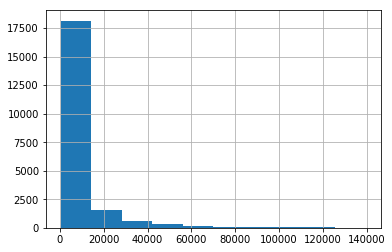

In [111]:
data.sqft_lot.hist()

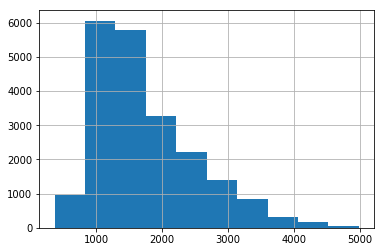

In [112]:
data.sqft_above.hist()

In [113]:
data.sqft_above.describe()

count    21061.000000
mean      1748.676891
std        760.361952
min        370.000000
25%       1180.000000
50%       1550.000000
75%       2170.000000
max       4980.000000
Name: sqft_above, dtype: float64

In [114]:
data.sqft_above.std()*3

2281.0858546254112

In [115]:
data.sqft_above.mean()+data.sqft_above.std()*3

4029.762745561264

In [116]:
len(data.loc[data["sqft_above"] > 4200])

137

In [117]:
data = data[data.sqft_above < 4200]

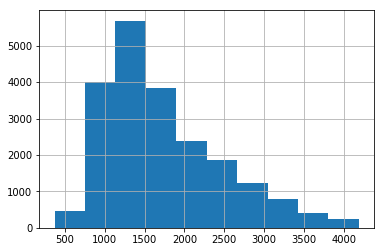

In [118]:
data.sqft_above.hist()

In [119]:
data.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 1995, 1963, 1960, 2003, 1942, 1927,
       1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985, 1941,
       1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 1984,
       2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973, 1925,
       1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006, 1988,
       2001, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1908, 1931, 1998, 1913, 2013, 1907, 1958,
       2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970, 1982,
       2015, 1934, 1938, 1919, 1906, 1935])

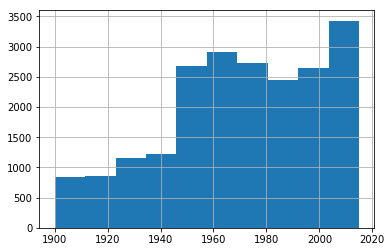

In [120]:
# Left skewed.
data.yr_built.hist()

In [121]:
data.yr_built.mean()-data.yr_built.std()*3

1882.250005735297

In [122]:
# Left skewed?  Do I need to normalize this?

In [123]:
data.yr_renovated.describe()

count    20922.000000
mean        68.401013
std        363.125533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

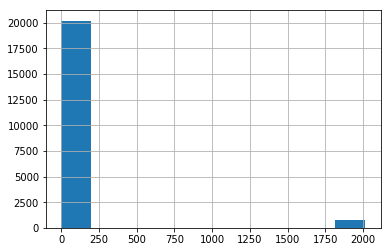

In [124]:
data.yr_renovated.hist()

In [125]:
data.yr_renovated.describe()

count    20922.000000
mean        68.401013
std        363.125533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

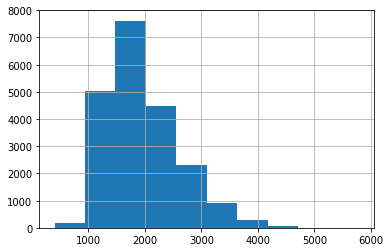

In [126]:
data.sqft_living15.hist()

In [127]:
data.sqft_living15.mean()+data.sqft_living15.std()*3

3884.643943793226

In [128]:
len(data.loc[data["sqft_living15"] > 4000])

124

In [129]:
# Let's get rid of the outliers
data = data[data.sqft_living15 < 4000]

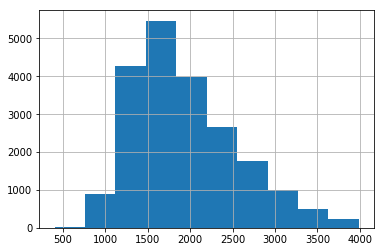

In [130]:
data.sqft_living15.hist()

In [131]:
data.sqft_lot15.std()*3

46976.765335167656

In [132]:
data.sqft_lot15.mean()+data.sqft_lot15.std()*3

57209.23018417708

In [133]:
len(data.loc[data["sqft_lot15"] > 58000])

260

In [134]:
# Let's get rid of the outliers
data = data[data.sqft_lot15 < 58000]

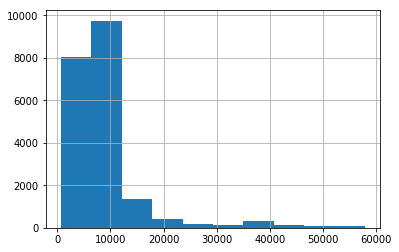

In [135]:
data.sqft_lot15.hist()

In [56]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.058100e+04,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000
mean,5.156199e+05,3.352558,2.075992,2007.234440,9807.790486,1.484840,0.005636,0.210923,3.415529,7.585200,1721.147952,280.380545,1970.313542,68.471211,98079.506098,47.561583,-122.220725,1937.110636,8930.396774
std,3.048922e+05,0.893444,0.724226,800.217481,10680.971960,0.540006,0.074865,0.725470,0.652885,1.079625,722.738212,424.383721,29.469178,363.315375,53.809132,0.138106,0.136163,620.310123,7597.103493
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,3.180000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.473900,-122.331000,1470.000000,5001.000000
50%,4.450000e+05,3.000000,2.250000,1880.000000,7440.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1973.000000,0.000000,98072.000000,47.573300,-122.244000,1810.000000,7500.000000
75%,6.250000e+05,4.000000,2.500000,2480.000000,10064.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,540.000000,1996.000000,0.000000,98118.000000,47.679200,-122.137000,2310.000000,9706.000000
max,3.710000e+06,11.000000,5.750000,5990.000000,137214.000000,3.500000,1.000000,4.000000,5.000000,12.000000,4190.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3990.000000,57934.000000


In [57]:
# Create bins for 'yr_renovated' based on the values observed. 4 values will result in 3 bins
bins_A = [0, 1900, 1990, 2000, 2008, 2015]
bins_yr_renovated = pd.cut(data['yr_renovated'], bins_A)
#bins_yr_renovated = bins_yr_renovated.as_unordered()


yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr_ren")
data = data.drop(["yr_renovated"], axis=1)
data = pd.concat([data, yr_renovated_dummy], axis=1)

In [58]:
# Create bins for 'sqft_basement' based on the values observed. 3 values will result in 2 bins
bins_B = [0, 100, 5000]
bins_sqft_basement = pd.cut(data['sqft_basement'], bins_B)

sqft_basement_dummy = pd.get_dummies(bins_sqft_basement, prefix="sqft_base", drop_first=True)
data = data.drop(["sqft_basement"], axis=1)
data = pd.concat([data, sqft_basement_dummy], axis=1)

In [59]:
# Create bins for 'view' based on the values observed. 3 values will result in 2 bins
bins_C = [0, 2, 4]
bins_view = pd.cut(data['view'], bins_C)

view_dummy = pd.get_dummies(bins_view, prefix="new_view", drop_first=True)
data = data.drop(["view"], axis=1)
data = pd.concat([data, view_dummy], axis=1)

In [60]:
# Create bins for 'grade' based on the values observed. 4 values will result in 3 bins
bins_D = [0, 5, 7, 13]
bins_grade = pd.cut(data['grade'], bins_D)

grade_dummy = pd.get_dummies(bins_grade, prefix="new_grade", drop_first=True)
data = data.drop(["grade"], axis=1)
data = pd.concat([data, grade_dummy], axis=1)

In [61]:
# Create bins for 'waterfront' based on the values observed. 3 values will result in 2 bins
bins_E = [0, 0.5, 1]
bins_waterfront = pd.cut(data['waterfront'], bins_E)

waterfront_dummy = pd.get_dummies(bins_waterfront, prefix="new_waterfront", drop_first=True)
data = data.drop(["waterfront"], axis=1)
data = pd.concat([data, waterfront_dummy], axis=1)

In [62]:
# Create bins for 'condition' based on the values observed. 4 values will result in 3 bins
bins_G = [0, 3, 4, 5]
bins_condition = pd.cut(data['condition'], bins_G)

condition_dummy = pd.get_dummies(bins_condition, prefix="new_condition", drop_first=True)
data = data.drop(["condition"], axis=1)
data = pd.concat([data, condition_dummy], axis=1)

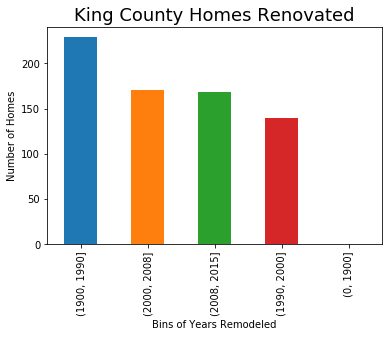

In [63]:
bins_yr_renovated.value_counts().plot(kind='bar')
plt.xlabel('Bins of Years Remodeled')
plt.ylabel('Number of Homes')
plt.title("King County Homes Renovated", fontsize=18)
plt.show()

In [64]:
bins_yr_renovated.value_counts()

(1900, 1990]    229
(2000, 2008]    170
(2008, 2015]    168
(1990, 2000]    139
(0, 1900]         0
Name: yr_renovated, dtype: int64

In [65]:
bins_yr_renovated.describe()

count              706
unique               4
top       (1900, 1990]
freq               229
Name: yr_renovated, dtype: object

### Log Transformation: These features have right skewed histograms
'sqft_above', 'sqft_lot', 'sqft_living', 'sqft_living15', 'sqft_lot15'

In [66]:
# Perform log transformation
logabove = np.log(data["sqft_above"])
loglot = np.log(data["sqft_lot"])
logliving = np.log(data["sqft_living"])
loglivingnear = np.log(data["sqft_living15"])
loglotnear = np.log(data["sqft_lot15"])

# Switch the Standardization into the original data
data["sqft_above"] = (logabove-np.mean(logabove))/np.sqrt(np.var(logabove))
data["sqft_lot"] = (loglot-np.mean(loglot))/np.sqrt(np.var(loglot))
data["sqft_living"] = (logliving-np.mean(logliving))/np.sqrt(np.var(logliving))
data["sqft_living15"] = (loglivingnear-np.mean(loglivingnear))/np.sqrt(np.var(loglivingnear))
data["sqft_lot15"] = (loglotnear-np.mean(loglotnear))/(np.sqrt(np.var(loglotnear)))

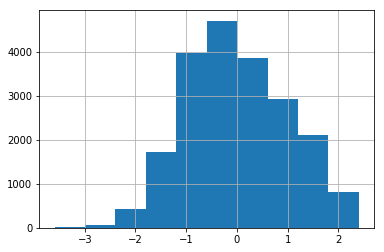

In [67]:
data.sqft_above.hist()


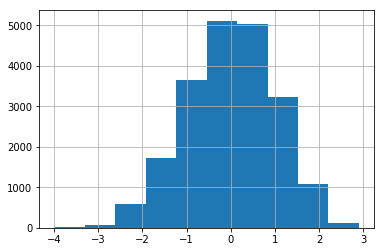

In [68]:
data.sqft_living.hist()


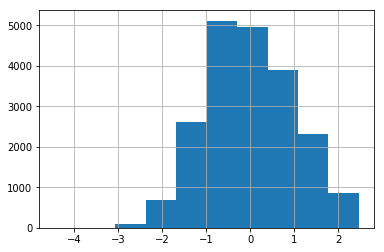

In [69]:
data.sqft_living15.hist()


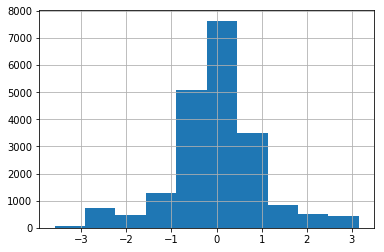

In [70]:
data.sqft_lot15.hist()


In [71]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,...,"yr_ren_(1990, 2000]","yr_ren_(2000, 2008]","yr_ren_(2008, 2015]","sqft_base_(100, 5000]","new_view_(2, 4]","new_grade_(5, 7]","new_grade_(7, 13]","new_waterfront_(0.5, 1.0]","new_condition_(3, 4]","new_condition_(4, 5]"
count,2.058100e+04,20581.000000,20581.000000,2.058100e+04,2.058100e+04,20581.000000,2.058100e+04,20581.000000,20581.000000,20581.000000,...,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000
mean,5.156199e+05,3.352558,2.075992,4.529576e-16,-1.104775e-17,1.484840,1.281539e-15,1970.313542,98079.506098,47.561583,...,0.006754,0.008260,0.008163,0.382003,0.033575,0.523347,0.464215,0.005636,0.265342,0.080171
std,3.048922e+05,0.893444,0.724226,1.000024e+00,1.000024e+00,0.540006,1.000024e+00,29.469178,53.809132,0.138106,...,0.081906,0.090511,0.089981,0.485889,0.180136,0.499467,0.498730,0.074865,0.441526,0.271564
min,7.800000e+04,1.000000,0.500000,-3.992233e+00,-3.527998e+00,1.000000,-3.595687e+00,1900.000000,98001.000000,47.155900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.180000e+05,3.000000,1.500000,-6.785738e-01,-4.965300e-01,1.000000,-7.287959e-01,1951.000000,98033.000000,47.473900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.450000e+05,3.000000,2.250000,3.397693e-02,3.577726e-02,1.000000,-8.669739e-02,1973.000000,98072.000000,47.573300,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.250000e+05,4.000000,2.500000,7.200369e-01,4.403908e-01,2.000000,7.311595e-01,1996.000000,98118.000000,47.679200,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,3.710000e+06,11.000000,5.750000,2.904221e+00,3.939581e+00,3.500000,2.403632e+00,2015.000000,98199.000000,47.777600,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
data = data.drop(['new_grade_(5, 7]'], axis=1)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,...,"yr_ren_(1900, 1990]","yr_ren_(1990, 2000]","yr_ren_(2000, 2008]","yr_ren_(2008, 2015]","sqft_base_(100, 5000]","new_view_(2, 4]","new_grade_(7, 13]","new_waterfront_(0.5, 1.0]","new_condition_(3, 4]","new_condition_(4, 5]"
0,2014-10-13,221900.0,3,1.00,-1.119643,-0.332836,1.0,-0.728796,1955,98178,...,0,0,0,0,0,0,0,0,0,0
1,2014-12-09,538000.0,3,2.25,0.808331,-0.000350,2.0,0.777151,1951,98125,...,0,1,0,0,1,0,0,0,0,0
2,2015-02-25,180000.0,2,1.00,-2.176967,0.431846,1.0,-1.784022,1933,98028,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,0.137195,-0.496530,1.0,-1.017333,1965,98136,...,0,0,0,0,1,0,0,0,0,1
4,2015-02-18,510000.0,3,2.00,-0.244616,0.146303,1.0,0.144495,1987,98074,...,0,0,0,0,0,0,1,0,0,0
6,2014-06-27,257500.0,3,2.25,-0.193545,-0.080959,2.0,0.195465,1995,98003,...,0,0,0,0,0,0,0,0,0,0
7,2015-01-15,291850.0,3,1.50,-1.385276,0.392568,1.0,-0.993902,1963,98198,...,0,0,0,0,0,0,0,0,0,0
8,2015-04-15,229500.0,3,1.00,-0.101405,0.041167,1.0,-1.017333,1960,98146,...,0,0,0,0,1,0,0,0,0,0
9,2015-03-12,323000.0,3,2.50,0.047117,-0.132822,2.0,0.435649,2003,98038,...,0,0,0,0,0,0,0,0,0,0
10,2015-04-03,662500.0,3,2.50,1.615430,0.404241,1.0,0.396097,1965,98007,...,0,0,0,0,1,0,1,0,0,0


In [73]:
# First I dropped "zipcode" and "date" because I still can't deal with them!  Then I dropped "floors" due to it's P-value!

y = pd.DataFrame(data, columns = ['price'])
X = data.drop(["price", "zipcode", 'date', 'floors'], axis=1)

In [74]:
# Run the statsmodel to look at the R-squared, P-values, and see the coefficients!
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     8974.
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:33:20   Log-Likelihood:            -2.7958e+05
No. Observations:               20581   AIC:                         5.592e+05
Df Residuals:                   20561   BIC:                         5.594e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
bedrooms                  -2.685e+04   2018.188    -13.302      0.000   -3.08e+04   -2.29e+04
bathrooms                  6.313e+04   3241.884     19.473      0.000    5.68e+04    6.95e+04
sqft_living                2.271e+04   5450.085      4.167      0.000     1.2e+04    3.34e+04
sqft_lot                  -1.435e+04   3294.253     -4.356      0.000   -2.08e+04   -7891.487
sqft_above                 9.594e+04   5131.817     18.694      0.000    8.59e+04    1.06e+05
yr_built                  -2816.9983     61.730    -45.634      0.000   -2937.994   -2696.002
lat                        5.425e+05   9754.117     55.621      0.000    5.23e+05    5.62e+05
long                       1.626e+05   4001.174     40.650      0.000    1.55e+05     1.7e+05
sqft_living15               5.18e+04   2177.138     23.792      0.000    4.75e+04    5.61e+04
sqft_lot15                -1.396e+04   3277.544     -4.259      0.000   -2.04e+04   -7534.670
yr_ren_(0, 1900]           1.513e-10   8.06e-12     18.770      0.000    1.35e-10    1.67e-10
yr_ren_(1900, 1990]       -4.556e+04    1.3e+04     -3.500      0.000   -7.11e+04      -2e+04
yr_ren_(1990, 2000]        5.958e+04   1.66e+04      3.593      0.000    2.71e+04    9.21e+04
yr_ren_(2000, 2008]        1.356e+05   1.51e+04      8.980      0.000    1.06e+05    1.65e+05
yr_ren_(2008, 2015]        6.994e+04   1.51e+04      4.622      0.000    4.03e+04    9.96e+04
sqft_base_(100, 5000]      8.057e+04   5656.949     14.242      0.000    6.95e+04    9.17e+04
new_view_(2, 4]            2.268e+05   8363.457     27.116      0.000     2.1e+05    2.43e+05
new_grade_(7, 13]           9.37e+04   3706.900     25.277      0.000    8.64e+04    1.01e+05
new_waterfront_(0.5, 1.0]  6.012e+05   1.96e+04     30.720      0.000    5.63e+05     6.4e+05
new_condition_(3, 4]       2.966e+04   3353.035      8.847      0.000    2.31e+04    3.62e+04
new_condition_(4, 5]       6.901e+04   5381.842     12.823      0.000    5.85e+04    7.96e+04
==============================================================================
Omnibus:                    12780.046   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           281881.545
Skew:                           2.603   Prob(JB):                         0.00
Kurtosis:                      20.367   Cond. No.                     1.65e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15435 5146 15435 5146


In [76]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [78]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 35349628197.76526
Test Mean Squarred Error: 37609441889.75936


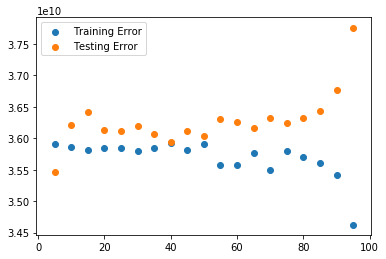

In [79]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-36404940549.49885

## Results

###### R-squared: 0.897 !  The P value looks better as well as the test-train split.